# ```Large Movie Reviews```


## Problem Statement

Given a set of 25,000 highly polar reviews for training and testing data each. Each set has 12,500 positive reviews and 12,500 negative reviews. Your aim is to develop a model to identify whether a given review is positive or not.   

## About the dataset

To start, the given reviews have already been stored in a table for you. The snapshot of the same is below:

**Train Data** (We will train our model on this)

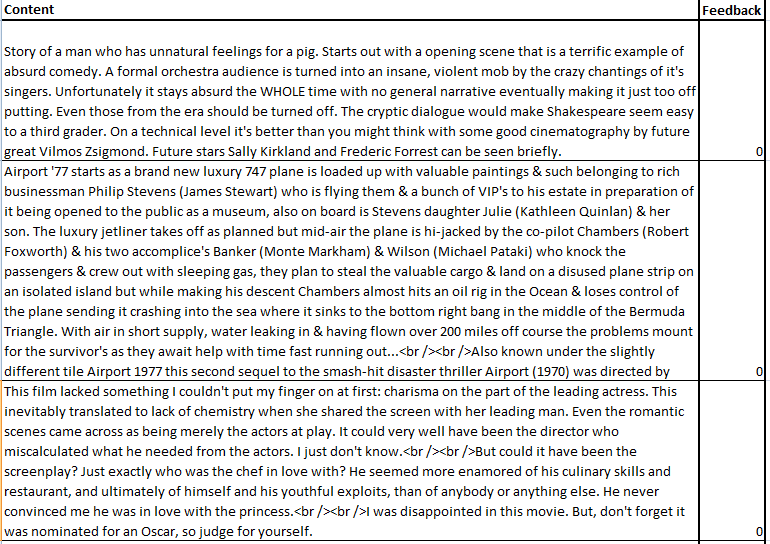

**Test Data** (We will validate our model on this)

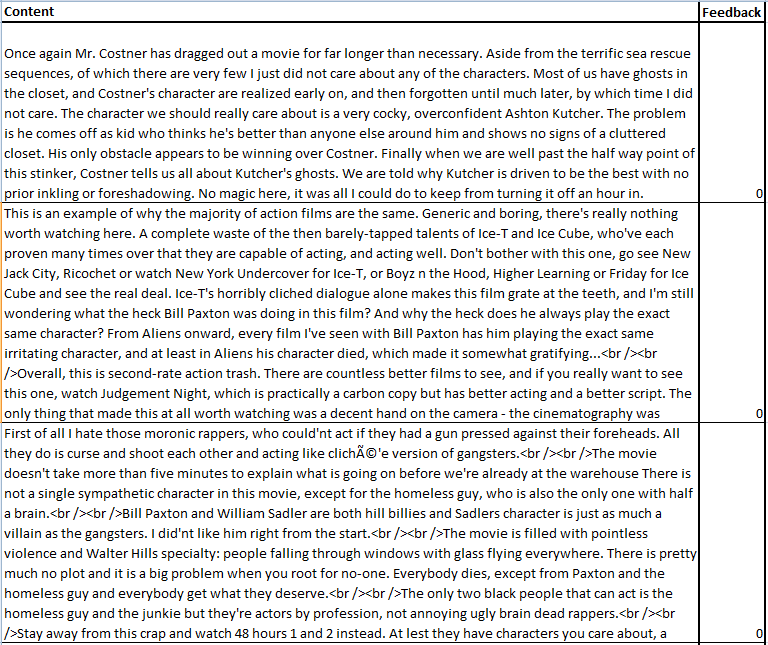

Each dataset has 25,000 reviews (12,500 positive and 12,500 negatives).

- **Content:** Reviews by the viewers
- **Feedback:** 1 - Positive, 0 - Negative

## Why solve the project

Solving this project will help you review your **Sentiment Analysis** skills. We will use the below concepts in the project:

- Techniques to process the text (tokenization, stemming & vectorization to create a corpus).
- Implementation of **Random Forest Classifier** and **Gaussian Naive Bayes Classifier.**
- Check the performance of the model.
- Further enhance the performance by applying **Gaussian Naive Bayes Classifier using TF-IDF Vectorizer.**



## ```Task 1: Loading and Cleaning Train & Test Data```

In this task, we will load the train & the test data and see how it looks.


## Instructions

- Load the train and the test datasets using **pandas.read_csv** and store them in `df_train` & `df_test` respectively. 
- Display the first 5 columns of the datasets using **head()**.

## Hints

- `df_train = pd.read_csv('traindata.csv')`

In [1]:
# Solution Code 

# import packages

import re
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the train dataset
df_train = pd.read_csv('traindata.csv')
print("Train Data")
print(df_train.head())

# Load the test dataset
df_test = pd.read_csv('testdata.csv')
print("======================================================================================")
print("Test Data")
print(df_test.head())



Train Data
                                             Content  Feedback
0  Story of a man who has unnatural feelings for ...         0
1  Airport '77 starts as a brand new luxury 747 p...         0
2  This film lacked something I couldn't put my f...         0
3  Sorry everyone,,, I know this is supposed to b...         0
4  When I was little my parents took me along to ...         0
Test Data
                                             Content  Feedback
0  Once again Mr. Costner has dragged out a movie...         0
1  This is an example of why the majority of acti...         0
2  First of all I hate those moronic rappers, who...         0
3  Not even the Beatles could write songs everyon...         0
4  Brass pictures (movies is not a fitting word f...         0


## ```Task 2: Cleaning the Data```

As we cannot work directly with raw data to fit a model as it might have inappropriate words and other characters.
Let's clean the review first so that we can handle the inappropriate words and punctuation marks.

*We will be working simultaneously on the train & the test data.*

## Instructions

- Create two empty lists `corpus_train` & `corpus_test` to store the cleaned text from the train & test respectively.
- Using a for loop, iterate over every review (take range as `(0, 25000)` as there are 25,000 reviews in each set).
- Store the train & test reviews in `review_train` & `review_test` respectively.
- Convert the respective reviews into replacement patterns and to regular expression patterns by using `re.sub()`.
- Convert the respective reviews into lower order by using `.lower()`.
- Use `.split()` to split the reviews.
- Instantiate `PorterStemmer()` and store it in variable `ps`.
- Remove the stop words english by using the `PorterStemmer()`.
- Join the spaces in review `' ' ` using `' '.join(review)`.
- Append the reviews to the respective corpus.

## Hints

- `review_train = re.sub("[^a-zA-Z]", " ", review_train)`
- `review_train = [word for word in review_train if word not in stopwords.words('english')]`
- `review_train = [ps.stem(i) for i in review_train]`

In [2]:
# import packages

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# declare empty list 'corpus_train' and 'corpus_test'
corpus_train = []
corpus_test = []

# for loop to fill in corpus for train data
for i in range(0, 25000):
    review_train = df_train['Content'].iloc[i]
    review_test = df_test['Content'].iloc[i]
    # retain alphabets
    review_train = re.sub("[^a-zA-Z]", " ", review_train)
    review_test = re.sub("[^a-zA-Z]", " ", review_test)
    # convert to lower case
    review_train = review_train.lower()
    review_test = review_test.lower()
    # tokenize
    review_train = review_train.split()
    review_test = review_test.split()
    # initialize stemmer object
    ps = PorterStemmer()
    # perform stemming
    review_train = [word for word in review_train if word not in stopwords.words('english')]
    review_train = [ps.stem(i) for i in review_train]
    review_test = [word for word in review_test if word not in stopwords.words('english')]
    review_test = [ps.stem(i) for i in review_test]
    # join elements of list
    review_train = ' '.join(review_train)
    review_test = ' '.join(review_test)
    # add to 'corpus'
    corpus_train.append(review_train)
    corpus_test.append(review_test)
    

## ```Task 3: Defining Independent & Dependent Variables```

Now, let us define our Independent & Dependent variables.

## Instructions

- Instantiate `CountVectorizer(max_features = 1500)` and store it in variable `cv`.
- Fit and transform the `CountVectorizer(max_features = 1500)` on `corpus_train` & `corpus_test` and store in `X_train` & `X_test` respectively.
- Store the train & test `Feedback` in `y_train` & `y_test` respectively.

## Hints

- `X_train = cv.fit_transform(corpus_train)`
- `y_train = df_train['Feedback']`

In [3]:
# Solution Code 

# import packages

from sklearn.feature_extraction.text import CountVectorizer

# Instantiate count vectorizer
cv = CountVectorizer(max_features = 1500)

# Independent train variable
X_train = cv.fit_transform(corpus_train)

# dependent train variable
y_train = df_train['Feedback']
    
# Independent test variable
X_test = cv.fit_transform(corpus_test)

# dependent test variable
y_test = df_test['Feedback']

## ```Task 4: Predicter check for Random Forest Classifier```

Now, since we have cleaned and defined the data, let's create a model and check it's performance.

## Instructions

- Instantiate `RandomForestClassifier(random_state=2)` and store it in variable `rf`.
- Fit the `RandomForestClassifier` on the training data.
- Predict on the test data and store in `y_pred`
- Display the `Classification Report` and `Accuracy`.

## Hints

- `rf.fit(X_train, y_train)`
- `y_pred = rf.predict(X_test)`

In [4]:
# Solution code 

# import packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics.classification import classification_report

# Insatntiate calssifier
rf = RandomForestClassifier(random_state=2)

# fit model on training data
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

# display 'Classification Report' and 'Accuracy'
print(classification_report(y_test, y_pred))
print("ACCURACY: ", round(accuracy_score(y_test, y_pred), 4))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58     12500
           1       0.50      0.31      0.38     12500

   micro avg       0.50      0.50      0.50     25000
   macro avg       0.50      0.50      0.48     25000
weighted avg       0.50      0.50      0.48     25000

ACCURACY:  0.5026


## ```Task 5: Predicter check for Gaussian NB Classifier```

Using a Random Forest Classifier, our model just had an accuracy score of 50% (as good as a random chance).
Let's fit another model and check it's performance.

## Instructions

- Instantiate `GaussianNB()` and store it in variable `nb`.
- Fit the `GaussianNB` on the training data.
- Predict on the test data and store in `y_pred` using `cross_val_predict` and `cv=10`.
- Display the `Classification Report` and `Accuracy`.

## Hints

- `nb.fit(X_train.toarray(), y_train)`
- `y_pred = cross_val_predict(nb, X_test.toarray(), y_test, cv=10)`

In [5]:
# Solution Code 

# import packages

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

# Insatntiate calssifier
nb = GaussianNB()

# fit model on training data
nb.fit(X_train.toarray(), y_train)

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(nb, X_test.toarray(), y_test, cv=10)

# display 'Classification Report' and 'Accuracy'
print(classification_report(y_test, y_pred))
print("ACCURACY::", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     12500
           1       0.81      0.67      0.73     12500

   micro avg       0.75      0.75      0.75     25000
   macro avg       0.76      0.75      0.75     25000
weighted avg       0.76      0.75      0.75     25000

ACCURACY:: 0.75464


## ```Task 6: Predicter check for Gaussian NB Classifier with TFIDF vectorizer```

Now that we have seen that the accuracy of our model increased from 50% to 75%. Let's try if we can further enhance it using NB Classifier with TFIDF vectorizer.

## Instructions

- Instantiate `TfidfVectorizer()` and store it in variable `vect`.
- Set the parameters of `vect` using `.set_params()` as mentioned in the comment.
- Fit and transform the `TfidfVectorizer()` on `df_train['Content']` and store in `train_vectors`.
- Fit the `GaussianNB` on `(train_vectors.toarray(), y_train)`.
- Transform the `TfidfVectorizer()` on `df_test['Content']` and store in `test_vectors`
- Predict on the test data and store in `y_pred` using `cross_val_predict` and `cv=10`.
- Display the `Classification Report` and `Accuracy`.

## Hints

- `vect = TfidfVectorizer()`
- `vect.set_params(tokenizer=TreebankWordTokenizer().tokenize)`
- `y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)`

In [6]:
# Solution Code

# import packages

from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

#instantiate TfidfVectorizer (with the default parameter tokenizer=TreebankWordTokenizer().tokenize)
vect = TfidfVectorizer()
vect.set_params(tokenizer=TreebankWordTokenizer().tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams, 2-grams and 3-grams
vect.set_params(ngram_range=(1, 3))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 100 documents
vect.set_params(min_df=100)

# fit and transform the `TfidfVectorizer()`
train_vectors = vect.fit_transform(df_train['Content'])

# fit the `GaussianNB`
nb.fit(train_vectors.toarray(), y_train)

# transform the `TfidfVectorizer()`
test_vectors = vect.transform(df_test['Content'])

# generate your cross-validation prediction with 10 fold Stratified sampling
y_pred = cross_val_predict(nb, test_vectors.toarray(), y_test, cv=10)

# display 'Classification Report' and 'Accuracy'
print(classification_report(y_test, y_pred))
print ("ACCURACY::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     12500
           1       0.82      0.81      0.82     12500

   micro avg       0.82      0.82      0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000

ACCURACY:: 0.8174
